# Another well-known gambling system is the martingale doubling system. Suppose you are betting on red to turn up in roulette. Every time you win, bet 1 dollar next time. Every time you lose, double your previous bet.

# Suppose that you use this system until you have won at least 5 dollars, or you have lost more than 100 dollars.

# Write a program to simulate this and play it a number of times and see how you do

# In his book The Newcomes, WM Thackeray remarks "You have not played as yet? Do not do so; above all avoid a martingale if you do." Was this good advice?

In [3]:
import numpy as np

In [1]:
def simulate_round(previous_bet, total):
    rand = np.random.randint(1,39)
    
    if (rand==1)|(rand==2):
        total -= previous_bet
        return 2*previous_bet, total
    elif rand%2==1:
        total -= previous_bet
        return 2*previous_bet, total
    else:
        total += previous_bet
        return 1, total

In [8]:
N_trials = 1000
ending_total = []

for i in range(N_trials):
    total = 0
    bet = 1

    while (total<=5)&(total>=-100):
        bet, total = simulate_round(bet, total)
    ending_total.append(total)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5

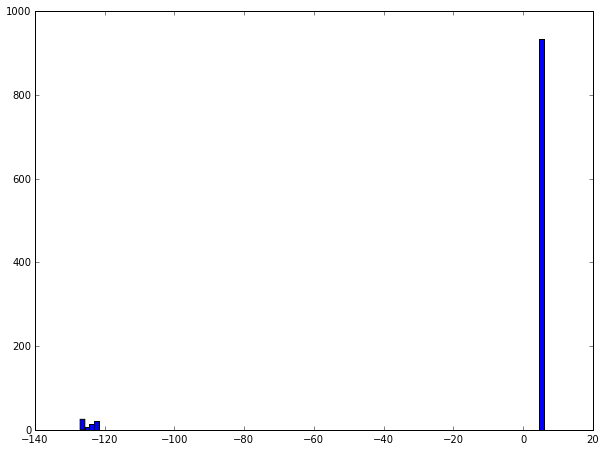

In [14]:
plt.hist(ending_total, bins = 100)
plt.show()

# Seems that it's way more common to win 6 than lose more than 100, but what's the expected payoff?

In [10]:
np.mean(ending_total)

-2.617

# It's negative

# Furthermore, let's make the stopping points symmetric (i.e. both 100)

In [15]:
N_trials = 1000
ending_total = []

for i in range(N_trials):
    total = 0
    bet = 1

    while (total<=100)&(total>=-100):
        bet, total = simulate_round(bet, total)
    ending_total.append(total)

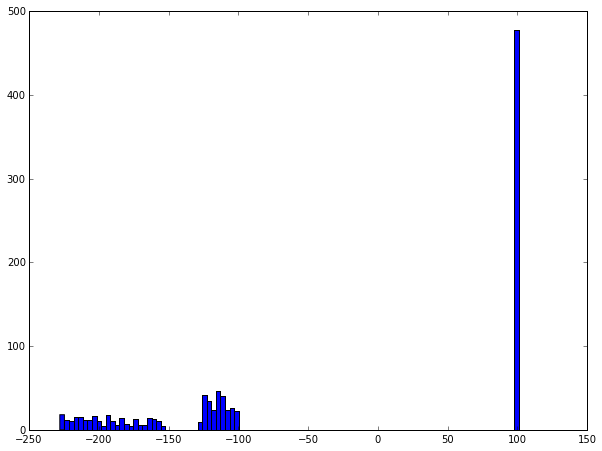

In [16]:
plt.hist(ending_total, bins = 100)
plt.show()

In [17]:
np.mean(ending_total)

-31.677

# Once again negative, so we expect to lose money with this strategy